# Contact Data - Average Contact Count Analysis

In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import urllib
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
plt.rcParams['figure.figsize'] = (14, 14)

In [3]:
def create_sql_connection(server, database):
	params = "Driver={SQL Server};" + f"Server={server};Database={database};Trusted_Connection=yes;"
	params = urllib.parse.quote_plus(params)
	sql_conn = create_engine('mssql+pyodbc:///?odbc_connect=%s' % params)
	return sql_conn

sql_conn = create_sql_connection(server='USEA1WDSCMB1', database='EDW_DATA_PROD')

In [309]:
query_excel = F"""
SELECT distinct 
	  AI.customerCode as customerCode
	  ,C.CONTACTID ContactID
	  ,C.[TYPE] as ContactType
      ,c.[ISPRIMARY]
	  ,IC.MANAGEMENTLEVEL as InforContactManagmentlevel
      ,C.[DEPARTMENT] as ContactDepartment
	  ,AI.industry as AccountIndustry
	  ,AI.subIndustry as AccountSubIndustry
	  ,AI.accountLOB as AccountLOB
	  ,AI.accountSubLOB as AccountSubLOB
	  ,AI.region as AccountRegion
	  ,AI.inforProfile as AccountInforProfile

  FROM [SRV_DVPROD].[EDW_STAGE].[dbo].[CRM_CONTACT] c

		INNER JOIN [SRV_DVPROD].[EDW_STAGE].[dbo].[CRM_INFORCONTACT] IC
				WITH(NOLOCK) ON C.CONTACTID = IC.CONTACTID

		JOIN [EDW_DATA_PROD].[dbo].[AccountInfo] AI
				WITH (NOLOCK) ON C.ACCOUNTID = LTRIM(RTRIM(AI.CUSTOMERCODE))
				AND AI.customerCategory = 'CUSTOMER'

		JOIN [EDW_DATA_PROD].[dbo].[NewestProductHistory] NPH
				WITH (NOLOCK) ON LTRIM(RTRIM(AI.customerCode)) = LTRIM(RTRIM(NPH.CUSTOMERCODE))
				AND NPH.active = 1

WHERE 
  c.[ACTIVEFLAG] = 'T'
  AND (COALESCE(c.isdeleted, 'F') <> 'T' OR c.ISDELETED = '' )
"""

In [310]:
df_excel = pd.read_sql_query(query_excel, sql_conn)

SystemError: <class 'pyodbc.Error'> returned a result with an error set

In [225]:
df_excel.to_excel("ContactsData.xlsx")

In [226]:
df_excel.to_csv("ContactsData.csv", sep=';', index=False)

In [298]:
df_excel.head()

,customerCode,ContactID,ContactType,ISPRIMARY,InforContactManagmentlevel,ContactDepartment,AccountIndustry,AccountSubIndustry,AccountLOB,AccountSubLOB,AccountRegion,AccountInforProfile
0,AICRMA00000T,CICRMA022SNX,Employee,T,Manager,Manufacturing/Production,Chemicals,Specialty Chemicals,AM MFG,Channel,NA,Sales Manager
1,AICRMA00000T,CICRMA01Q7QE,Employee,F,Director,Research/Development,Chemicals,Specialty Chemicals,AM MFG,Channel,NA,Sales Manager
2,AICRMA00000T,CICRMA01Q7QD,Employee,F,C-Level Executive,Finance/Administration,Chemicals,Specialty Chemicals,AM MFG,Channel,NA,Sales Manager
3,AICRMA00000T,CICRMA01Q7QF,Employee,F,C-Level Executive,Operations,Chemicals,Specialty Chemicals,AM MFG,Channel,NA,Sales Manager
4,AICRMA000020,CICRMA018WSW,Employee,F,C-Level Executive,CEO,Distribution,Automotive Parts Distribution,INT CSI,Central,EMEA,Sales Manager


In [4]:
query = F"""SELECT distinct 
                AI.customerCode
                ,count(distinct C.CONTACTID) as ContactDistinctCount
                ,AI.industry as AccountIndustry
                ,AI.subIndustry as AccountSubIndustry
                ,AI.accountLOB as AccountLOB
                ,AI.accountSubLOB as AccountSubLOB
                ,AI.region as AccountRegion
                ,AI.inforProfile as AccountInforProfile

  FROM [SRV_DVPROD].[EDW_STAGE].[dbo].[CRM_CONTACT] c

                             INNER JOIN [SRV_DVPROD].[EDW_STAGE].[dbo].[CRM_INFORCONTACT] IC
                                                          WITH(NOLOCK) ON C.CONTACTID = IC.CONTACTID
                                                                                               AND IC.[OPTOUTCALLINGPERMISSIONS] <> 'Opt Out'


                             JOIN [EDW_DATA_PROD].[dbo].[AccountInfo] AI
                                                          WITH (NOLOCK) ON C.ACCOUNTID = LTRIM(RTRIM(AI.CUSTOMERCODE))
                                                          AND AI.customerCategory = 'CUSTOMER'

                             JOIN [EDW_DATA_PROD].[dbo].[NewestProductHistory] NPH
                                                          WITH (NOLOCK) ON LTRIM(RTRIM(AI.customerCode)) = LTRIM(RTRIM(NPH.CUSTOMERCODE))
                                                          AND NPH.active = 1

WHERE 

  c.[ACTIVEFLAG] = 'T'
  and (c.email NOT LIKE '%@gmail.com' AND c.email NOT LIKE '%@koch.com'AND c.email NOT LIKE '%@infor.com' 
             AND c.email NOT LIKE '%@hotmail.com' AND c.email NOT LIKE '%@mail.com' AND c.email NOT LIKE '%@msn.com' 
             AND c.email NOT LIKE '%@yahoo.com' AND c.email NOT LIKE '%@live.com' AND c.email NOT LIKE '%@email.com'
             AND c.email NOT LIKE '%@icloud.com' AND c.email NOT LIKE '%@yahoo.co.uk' AND c.email NOT LIKE '%@hotmail.co.uk'
             AND c.email NOT LIKE '%@qq.com' AND c.email NOT LIKE '%@126.com' AND c.email NOT LIKE '%@163.com'
             AND c.email NOT LIKE '%@fhr.com' AND c.email NOT LIKE '%@gapac.com' AND c.email NOT LIKE '%@guardian.com'
             AND c.email NOT LIKE '%@invista.com' AND c.email NOT LIKE '%@kochind.com' AND c.email NOT LIKE '%@molex.com')
                                                 
  and (COALESCE(c.isdeleted, 'F') <> 'T' OR c.ISDELETED = '' )

  group by AI.customerCode
                               ,AI.industry 
                               ,AI.subIndustry
                               ,AI.accountLOB
                               ,AI.accountSubLOB 
                               ,AI.region
                               ,AI.inforProfile
"""


In [5]:
df = pd.read_sql_query(query, sql_conn)

In [6]:
df.head()

,customerCode,ContactDistinctCount,AccountIndustry,AccountSubIndustry,AccountLOB,AccountSubLOB,AccountRegion,AccountInforProfile
0,AICRMA00000T,4,Chemicals,Specialty Chemicals,AM MFG,Channel,NA,Sales Manager
1,AICRMA000020,1,Distribution,Automotive Parts Distribution,INT CSI,Central,EMEA,Sales Manager
2,AICRMA00002D,3,Life Sciences,Personal Care and Perfumes,AM MFG,Channel,NA,Channel Rep
3,AICRMA00002H,1,Public Sector,Nonprofit,Americas Services,Srv-Ind Financials,NA,Sales Manager
4,AICRMA000043,6,Healthcare,Provider of Health Services,Americas Services,Srv-Ind Financials,NA,Sales Manager


In [35]:
df[df['ContactDistinctCount']>1000]

,customerCode,ContactDistinctCount,AccountIndustry,AccountSubIndustry,AccountLOB,AccountSubLOB,AccountRegion,AccountInforProfile,ContactDistinctCount_bin
1139,AICRMA0022W5,1523,Equipment Service & Rental,Industrial,AM MFG,Discrete,NA,License Rep,"(200, 3000]"
6382,AICRMA004WGH,2625,Public Sector,Higher Education,Americas Services,Hospitality,NA,License Rep,"(200, 3000]"
7152,AICRMA00554Q,1016,Retail,Grocery,Majors,Retail,NA,License Rep,"(200, 3000]"
8985,AICRMA009D58,1022,Retail,General,Majors,Retail,NA,License Rep,"(200, 3000]"
9318,AICRMA009ILP,1618,Fashion,Footwear,Majors,Retail,NA,License Rep,"(200, 3000]"
11350,AICRMA00AJS6,1536,Industrial Machinery & Equipment,Ind. Machinery,Majors,MFG,NA,License Rep,"(200, 3000]"
12075,AICRMA00AU66,1306,Retail,Miscellaneous Goods,Majors,Retail,NA,License Rep,"(200, 3000]"
20373,AICRMA00EXAV,1233,Retail,Department,Majors,Retail,NA,License Rep,"(200, 3000]"
20395,AICRMA00EXR9,1162,Healthcare,Provider of Health Services,Americas Services,Healthcare,NA,License Rep,"(200, 3000]"
30845,AICRMA00JR3H,1355,Fashion,Footwear,Majors,Retail,NA,License Rep,"(200, 3000]"


# Account Industry / SubIndustry

In [7]:
df.groupby('AccountIndustry').sum().sort_values(by='ContactDistinctCount', ascending=False)

,ContactDistinctCount
AccountIndustry,
Industrial Manufacturing,66350
Healthcare,41408
Distribution,32562
High Tech & Communications,26695
Industrial Machinery & Equipment,26536
Public Sector,26466
Financial Services,26259
Food & Beverage/CPG,25086
Hospitality-Travel-Leisure,24567


In [8]:
pd.DataFrame(df['AccountIndustry'].value_counts())

,AccountIndustry
Industrial Manufacturing,5799
Hospitality-Travel-Leisure,4902
Distribution,3753
Professional Services,2814
Public Sector,2780
Financial Services,2295
Industrial Machinery & Equipment,2145
Construction & Engineering,2005
General Industry,1856
High Tech & Communications,1752


In [9]:
df_tmp = pd.DataFrame(df['AccountIndustry'].value_counts())
ordered_ind = df_tmp['AccountIndustry'].index
ordered_ind

Index(['Industrial Manufacturing', 'Hospitality-Travel-Leisure',
       'Distribution', 'Professional Services', 'Public Sector',
       'Financial Services', 'Industrial Machinery & Equipment',
       'Construction & Engineering', 'General Industry',
       'High Tech & Communications', 'Healthcare', 'Food & Beverage/CPG',
       'Fashion', 'Automotive', 'Energy & Natural Resources', 'Retail',
       'Logistics & 3PL', 'Chemicals', 'Equipment Service & Rental',
       'Life Sciences', 'Aerospace & Defense', 'Travel and Transport',
       'Paper & Pulp', 'Chemicals & Life Sciences', 'Miscellaneous Goods',
       'Construction'],
      dtype='object')

# Boxplot(and stripplot) of average contact count within each industry

Text(0, 0.5, '')

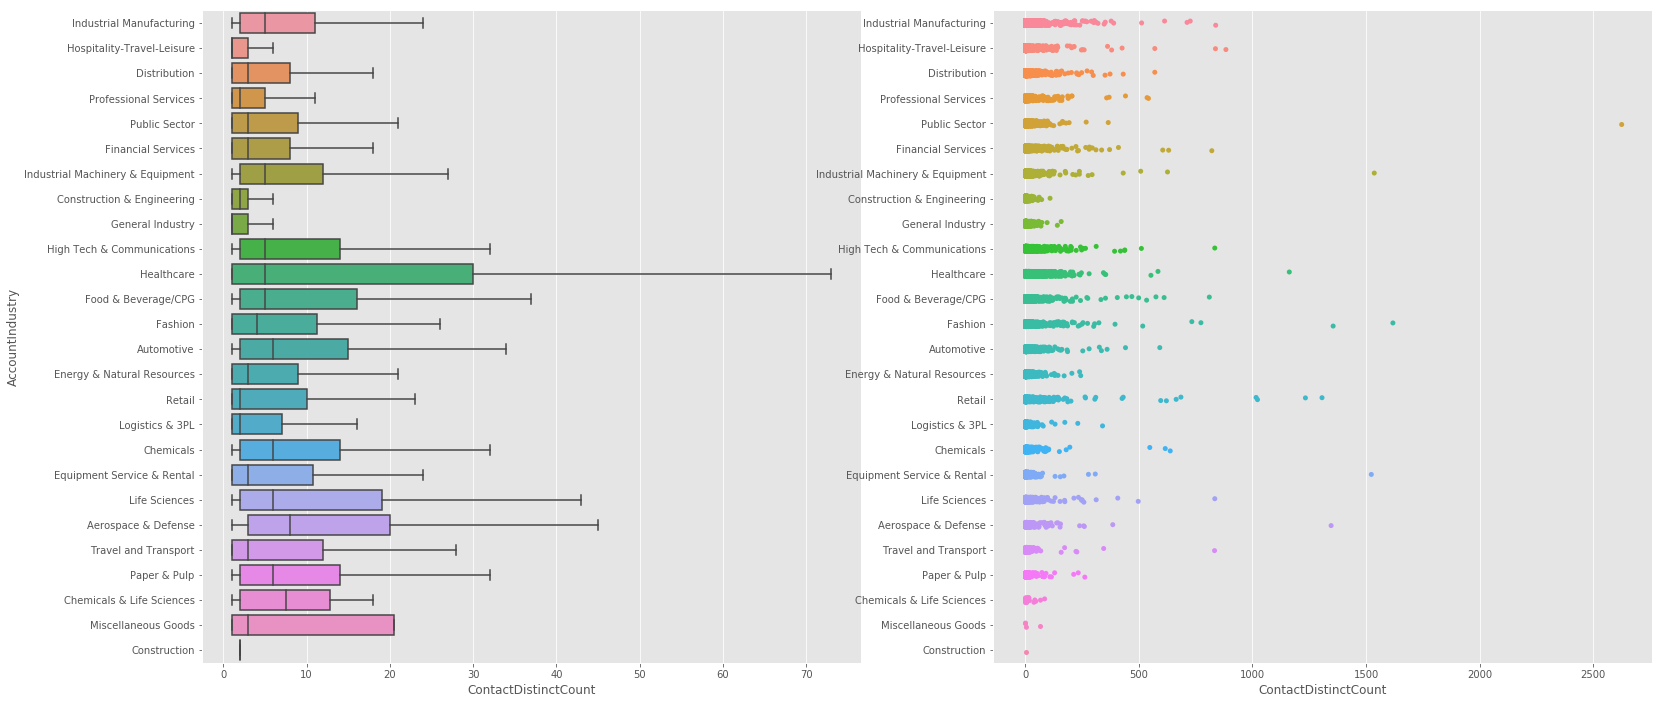

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(26, 12))
sns.stripplot(x='ContactDistinctCount', y='AccountIndustry', data=df, order=ordered_ind, ax=axes[1])
sns.boxplot(x='ContactDistinctCount', y='AccountIndustry', data=df, order=ordered_ind, showfliers=False, ax=axes[0])
axes[1].set_ylabel('')

In [11]:
df.groupby('AccountIndustry').mean().sort_values(by='ContactDistinctCount', ascending=False)

,ContactDistinctCount
AccountIndustry,
Retail,26.650685
Healthcare,24.415094
Aerospace & Defense,24.159420
Life Sciences,23.490291
Fashion,20.140511
Food & Beverage/CPG,19.491841
Miscellaneous Goods,18.500000
Automotive,16.578286
Travel and Transport,16.114068


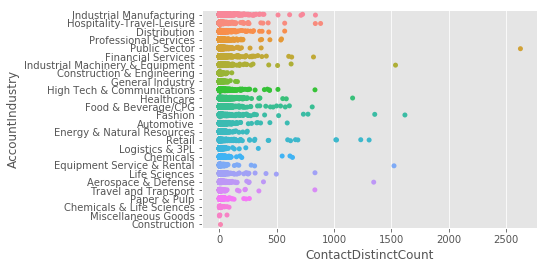

In [12]:
ax = sns.stripplot(x='ContactDistinctCount', y='AccountIndustry', data=df, order=ordered_ind)

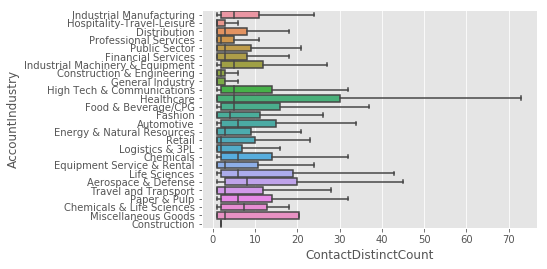

In [13]:
ax = sns.boxplot(x='ContactDistinctCount', y='AccountIndustry', data=df, order=ordered_ind, showfliers=False)

In [14]:
df_tmp = pd.DataFrame(df['AccountSubIndustry'].value_counts())
sub_ind_over_250 = list(df_tmp[df_tmp['AccountSubIndustry'] > 250].index)

In [15]:
df_tmp.head(30)

,AccountSubIndustry
Hotels and Motels,3347
Metal Fabrication,1717
Advisory and Consulting,1680
Provider of Health Services,1670
Ind. Machinery,1403
Facilities Management,1210
Other Financial Services,1063
Industrial Distribution,1061
Trade Contractors,914
Business Services,889


# Subindustry

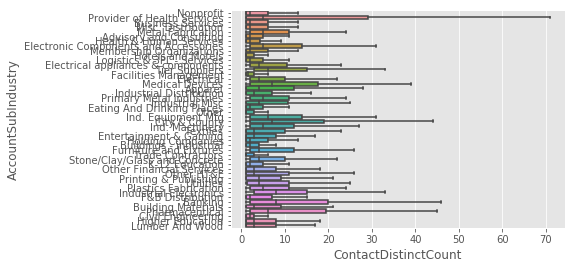

In [16]:

ax = sns.boxplot(x='ContactDistinctCount', y='AccountSubIndustry', data=df[df['AccountSubIndustry'].isin(sub_ind_over_250)], showfliers=False)

In [17]:
print("Average Contact Count within industry")
df.groupby('AccountIndustry').mean().sort_values(by='ContactDistinctCount', ascending=False)

Average Contact Count within industry


,ContactDistinctCount
AccountIndustry,
Retail,26.650685
Healthcare,24.415094
Aerospace & Defense,24.159420
Life Sciences,23.490291
Fashion,20.140511
Food & Beverage/CPG,19.491841
Miscellaneous Goods,18.500000
Automotive,16.578286
Travel and Transport,16.114068


# Contact Distinct Count for all Contacts

Number of contacts vs counts within each number

In [18]:
print("No. contacts | Counts")
df['ContactDistinctCount'].value_counts()

No. contacts | Counts


1       13317
2        5540
3        3237
4        2412
5        1830
6        1562
7        1228
8        1016
9         834
10        754
11        664
12        568
13        514
14        477
15        371
16        332
17        315
18        290
20        247
19        233
21        213
22        202
23        188
24        172
25        146
26        139
28        127
27        125
29        113
32         99
        ...  
553         1
393         1
712         1
616         1
584         1
360         1
142         1
208         1
244         1
272         1
1523        1
883         1
499         1
371         1
275         1
147         1
1618        1
626         1
306         1
274         1
210         1
1233        1
497         1
369         1
305         1
241         1
592         1
336         1
304         1
335         1
Name: ContactDistinctCount, Length: 355, dtype: int64

## Count plot of contact count (<20)

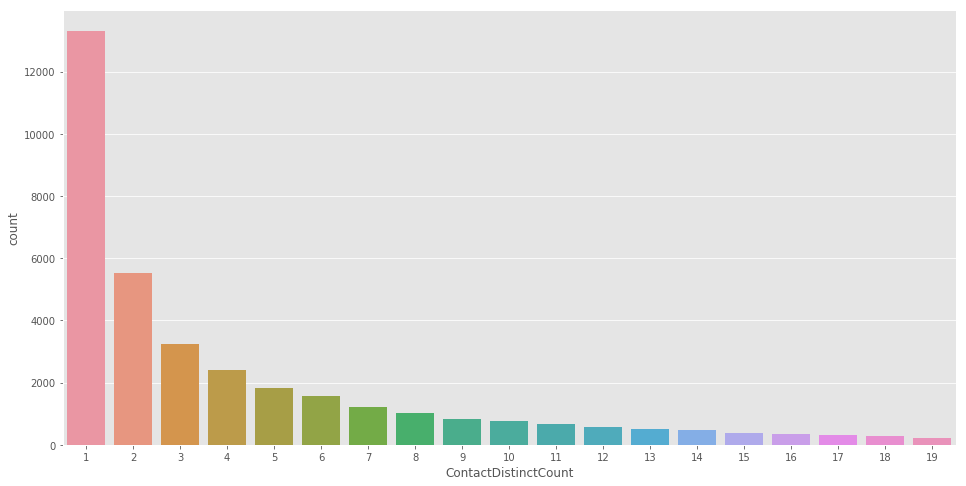

In [19]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(x="ContactDistinctCount", data=df[df['ContactDistinctCount']<20])

## For each industry

Chemicals


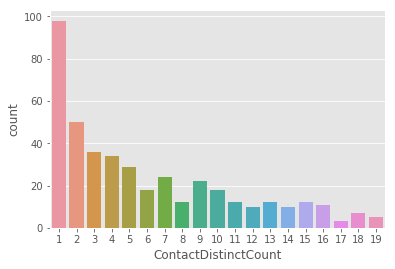

Distribution


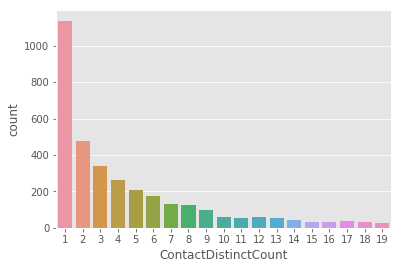

Life Sciences


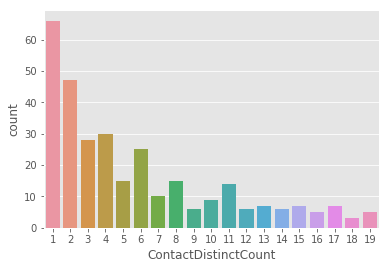

Public Sector


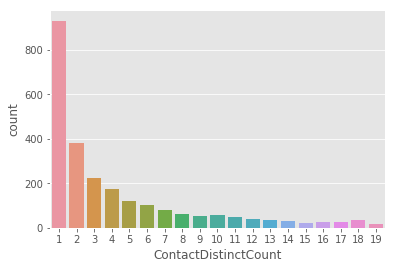

Healthcare


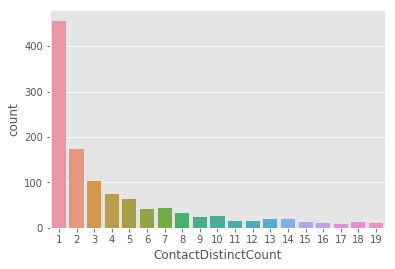

Energy & Natural Resources


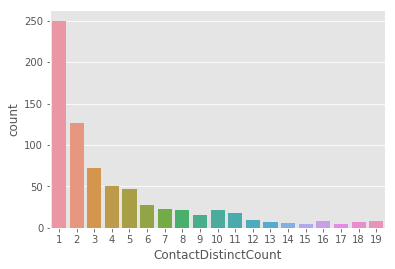

Food & Beverage/CPG


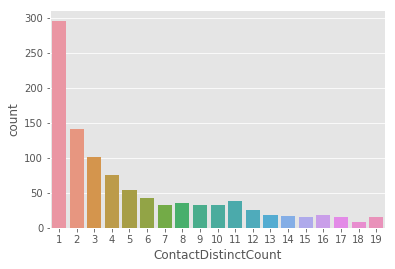

Professional Services


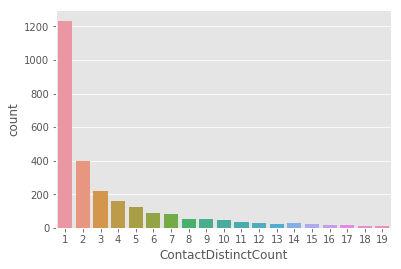

Industrial Manufacturing


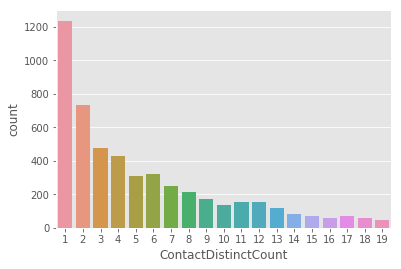

High Tech & Communications


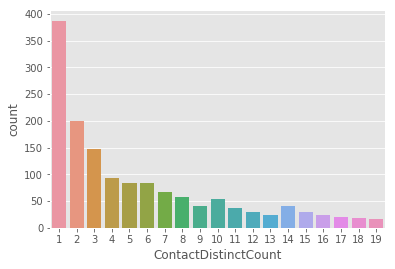

Financial Services


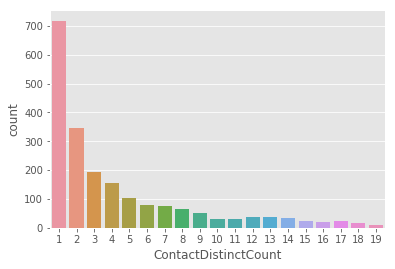

Hospitality-Travel-Leisure


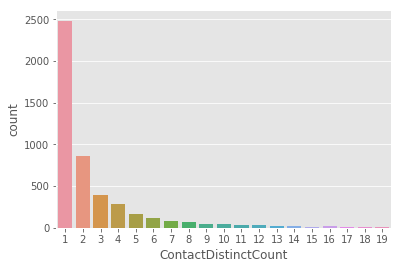

Logistics & 3PL


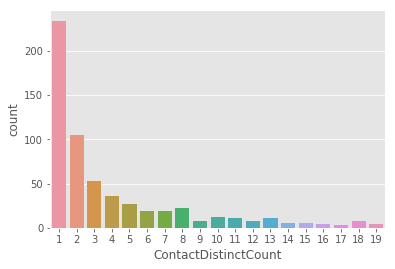

Automotive


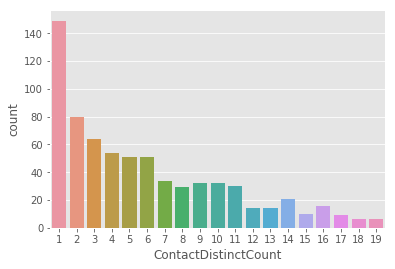

Equipment Service & Rental


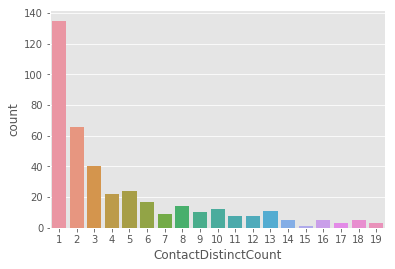

General Industry


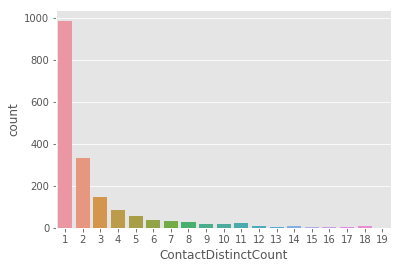

Retail


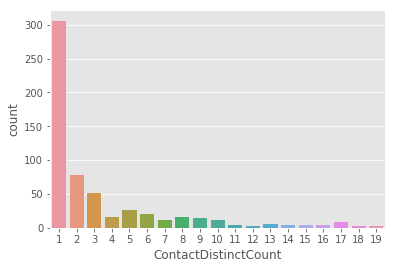

Fashion


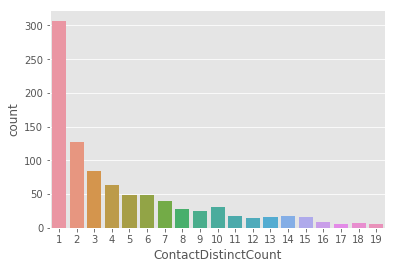

Industrial Machinery & Equipment


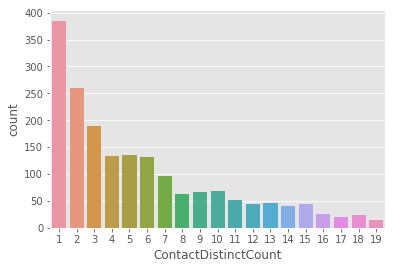

Travel and Transport


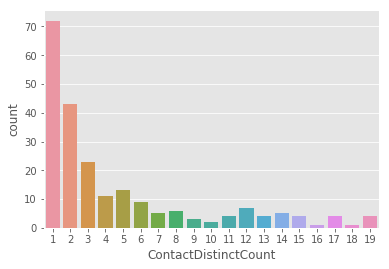

Construction & Engineering


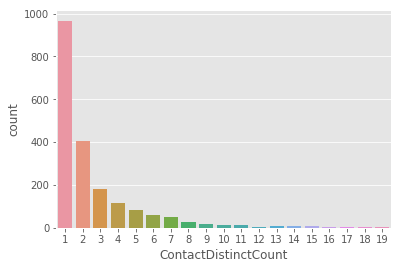

Aerospace & Defense


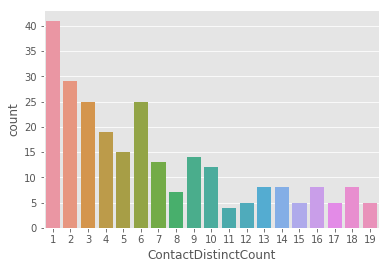

Paper & Pulp


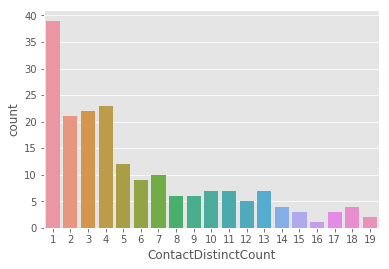

None
Chemicals & Life Sciences


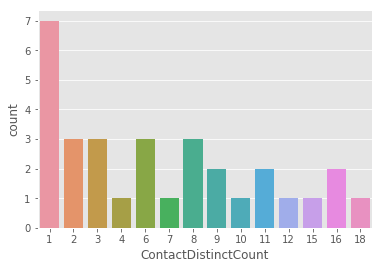

Miscellaneous Goods


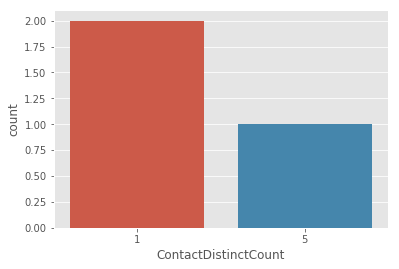

Construction


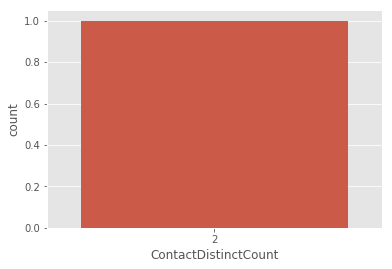

In [20]:
for ind in df['AccountIndustry'].unique():
    print(ind)
    if ind:
        sns.countplot(x="ContactDistinctCount", data=df[(df['ContactDistinctCount']<20) 
                                                            & (df['AccountIndustry'] == ind)])
        plt.show()

In [21]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [22]:
@interact(_from=widgets.IntSlider(min=0, max=3000, step=1, value=0), _to=widgets.IntSlider(min=0, max=3000, step=1, value=20), 
          _every=widgets.IntSlider(min=1, max=3000, step=1, value=1))
def plot_counts(_from, _to, _every):
    fig, ax = plt.subplots(figsize=(14, 8))
    df['ContactDistinctCount_bin'] = pd.cut(df['ContactDistinctCount'], bins=range(_from, _to, _every))
    ax = sns.countplot(df['ContactDistinctCount_bin'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)    
    ax.set_xlabel("Contact Count Bucket")
    ax.set_ylabel("Contact Count")

interactive(children=(IntSlider(value=0, description='_from', max=3000), IntSlider(value=20, description='_to'…

Text(0, 0.5, 'Contact Count')

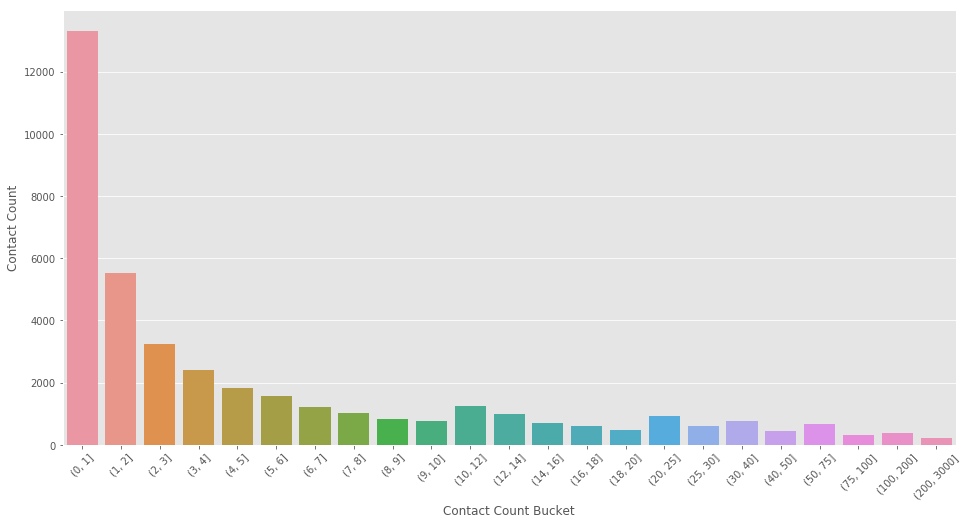

In [23]:
fig, ax = plt.subplots(figsize=(16,8))
df['ContactDistinctCount_bin'] = pd.cut(df['ContactDistinctCount'], bins=[0,1,2,3,4,5,6,7,8,9,10, 12,14, 16,18, 20, 25, 30, 40, 50, 75, 100, 200, 3000])
ax = sns.countplot(df['ContactDistinctCount_bin'])
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel("Contact Count Bucket")
ax.set_ylabel("Contact Count")

In [24]:
df.head()

,customerCode,ContactDistinctCount,AccountIndustry,AccountSubIndustry,AccountLOB,AccountSubLOB,AccountRegion,AccountInforProfile,ContactDistinctCount_bin
0,AICRMA00000T,4,Chemicals,Specialty Chemicals,AM MFG,Channel,NA,Sales Manager,"(3, 4]"
1,AICRMA000020,1,Distribution,Automotive Parts Distribution,INT CSI,Central,EMEA,Sales Manager,"(0, 1]"
2,AICRMA00002D,3,Life Sciences,Personal Care and Perfumes,AM MFG,Channel,NA,Channel Rep,"(2, 3]"
3,AICRMA00002H,1,Public Sector,Nonprofit,Americas Services,Srv-Ind Financials,NA,Sales Manager,"(0, 1]"
4,AICRMA000043,6,Healthcare,Provider of Health Services,Americas Services,Srv-Ind Financials,NA,Sales Manager,"(5, 6]"


# Account LOB/SubLOB distinct count

In [25]:
df_tmp = pd.DataFrame(df['AccountLOB'].value_counts())
ordered_lob = df_tmp['AccountLOB'].index
ordered_lob

Index(['Americas Services', 'INT NWE', 'AM MFG', 'INT CSI', 'INT APAC',
       'EAM/WFM/Birst', 'Majors', 'Not Owned', 'Inside Sales', '', 'IS', 'ICS',
       'Sales & LMO Ops', 'INX/SCM', 'EMEA', 'Alliances', 'Channel', 'LMO',
       'Partner', 'Infor Ignite', 'Europe', 'Presales'],
      dtype='object')

In [26]:
df_tmp

,AccountLOB
Americas Services,12682
INT NWE,8261
AM MFG,7239
INT CSI,4956
INT APAC,3510
EAM/WFM/Birst,1019
Majors,921
Not Owned,615
Inside Sales,512
,216


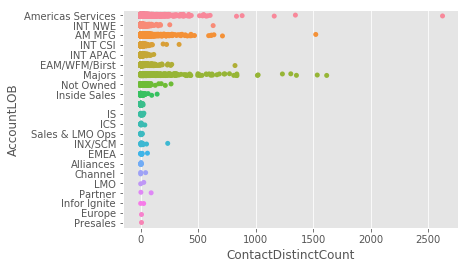

In [27]:
ax = sns.stripplot(x='ContactDistinctCount', y='AccountLOB', order=ordered_lob, data=df)

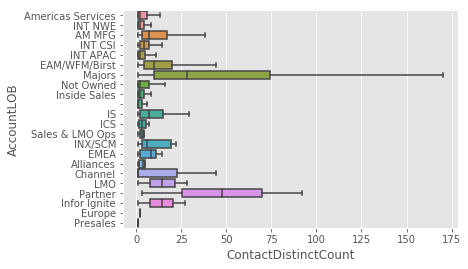

In [28]:
ax = sns.boxplot(x='ContactDistinctCount', y='AccountLOB', data=df, order=ordered_lob, showfliers=False)

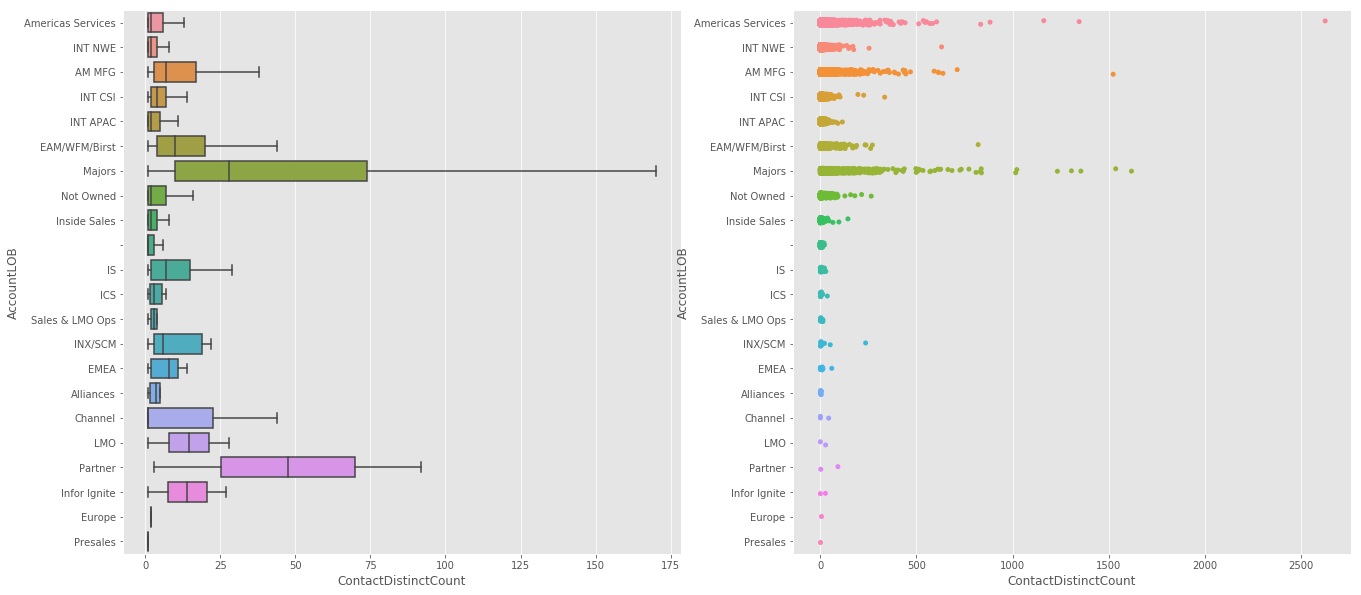

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(22, 10))
sns.boxplot(x='ContactDistinctCount', y='AccountLOB', data=df, order=ordered_lob, showfliers=False, ax=axes[0])
sns.stripplot(x='ContactDistinctCount', y='AccountLOB', order=ordered_lob, data=df, ax=axes[1])

In [30]:
df_tmp = pd.DataFrame(df['AccountSubLOB'].value_counts())
ordered_sublob = df_tmp['AccountSubLOB'].index
ordered_sublob

Index(['UKI', 'Hospitality', 'Srv-Ind Financials', 'Channel', 'Central',
       'South', 'Discrete', 'Public Sector', 'ASEAN', 'Process & Distribution',
       'Healthcare', 'EAM', '', 'China', 'LATAM', 'Pacific', 'MEA', 'MFG',
       'Nordics', 'BLX', 'Retail', 'East Eur', 'India', 'Japan', 'WFM/TS',
       'Asset Intensive', 'PACIFIC', 'Israel', 'Birst', 'Koch', 'INX/SCM',
       'West', 'Infor Ignite', 'EMEA', 'Strategic', 'General'],
      dtype='object')

Text(0, 0.5, '')

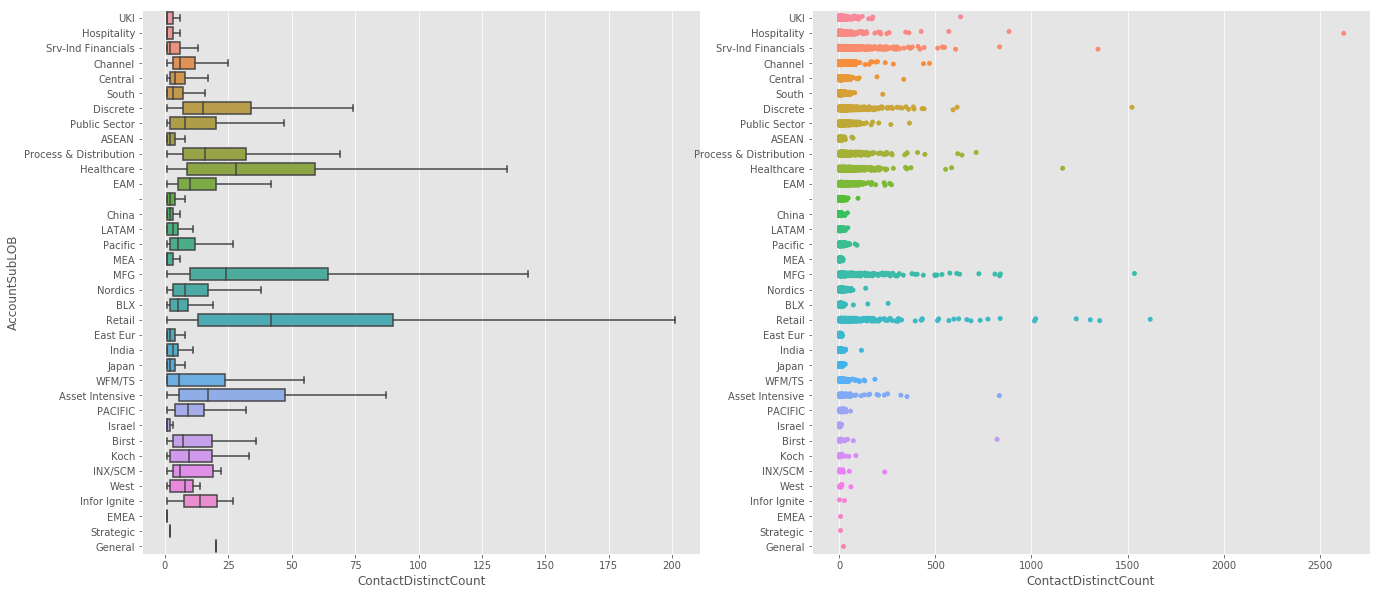

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(22, 10))
sns.boxplot(x='ContactDistinctCount', y='AccountSubLOB', data=df, order=ordered_sublob, showfliers=False, ax=axes[0])
sns.stripplot(x='ContactDistinctCount', y='AccountSubLOB', order=ordered_sublob, data=df, ax=axes[1])
axes[1].set_ylabel("")

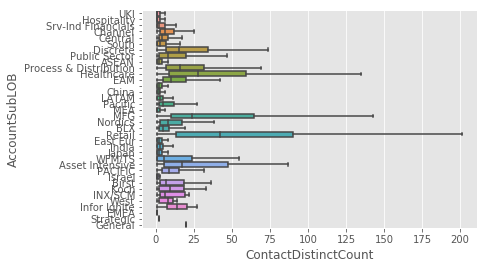

In [32]:
ax = sns.boxplot(x='ContactDistinctCount', y='AccountSubLOB', data=df, order=ordered_sublob, showfliers=False)

# Account Region

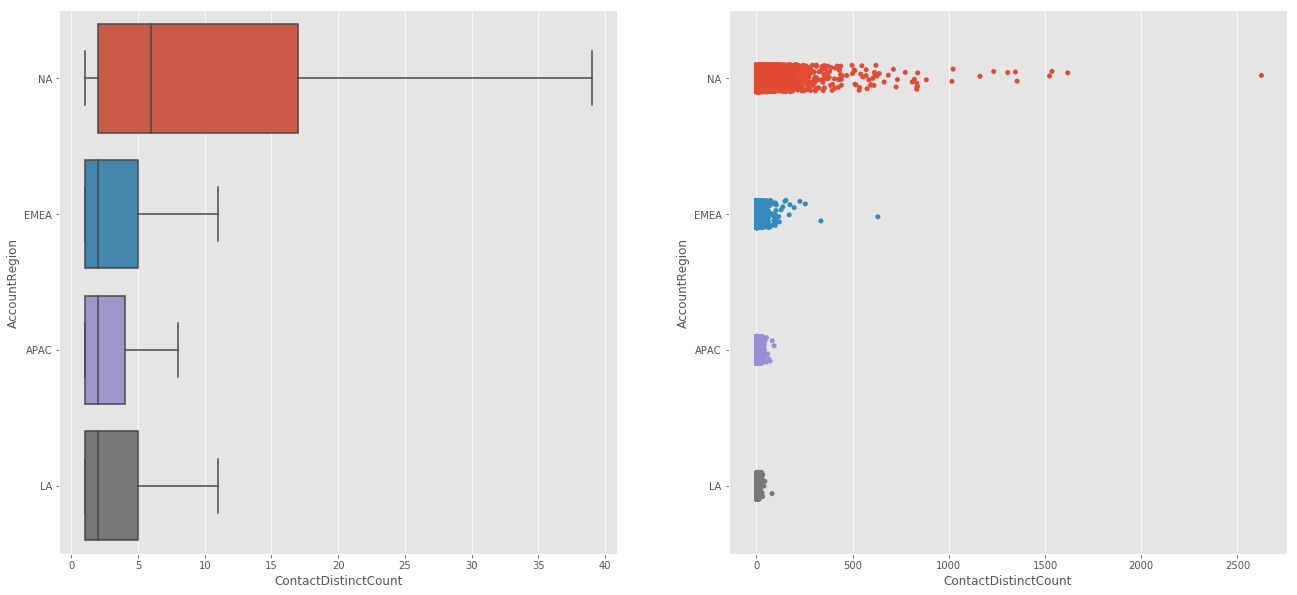

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(22, 10))
sns.boxplot(x='ContactDistinctCount', y='AccountRegion', data=df, showfliers=False, ax=axes[0])
sns.stripplot(x='ContactDistinctCount', y='AccountRegion', data=df, ax=axes[1])

# ax = sns.boxplot(x='ContactDistinctCount', y='AccountRegion', data=df, showfliers=False)